<h1>Installing RDKit</h1>

In [1]:
import rdkit
import deepchem as dc
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn

In [2]:
dc.__version__

'2.5.0'

In [3]:
np.__version__

'1.19.5'

In [4]:
tf.__version__

'2.6.0'

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/saharctech/Binding-Free-Energy-Prediction-Host-Guest-System/master/Results/dataset.csv')

In [6]:
df.head()

,dataset group name,Dataset Name,Host,Guest,Ex _G_(kcal/mol),Ex _G_SEM,EX _H_(kcal/mol),EX _H_SEM,pb_guest_Etot,pb_guest_VDWAALS,...,gb_host_1-4EEL,gb_host_EELEC,gb_host_EGB,gb_host_ESURF,gb_delta_H,pb_delta_H,EX _delta_H_(kcal/mol),gb_Ex_difference,SQR_gbnsr6_Ex_difference,pb_Ex_difference
0,Mobley benchmarkset,cd-set1,acd,guest-1,-1.575,0.019,-2.17,0.05,-47.8832,-0.0564,...,423.5761,-428.9520,-96.4471,5.1691,-1.9950,-0.8408,-2.17,0.1750,0.030625,1.3292
1,Mobley benchmarkset,cd-set1,acd,guest-2,-3.533,0.004,-4.19,0.02,-52.0758,-0.3831,...,412.6663,-397.9784,-106.4154,5.0726,-11.2624,-8.4809,-4.19,-7.0724,50.018842,-4.2909
2,Mobley benchmarkset,cd-set1,acd,guest-3,-4.606,0.007,-5.46,0.03,-51.5323,-0.6493,...,426.2925,-429.3068,-95.2452,5.1352,-15.4074,-13.8234,-5.46,-9.9474,98.950767,-8.3634
3,Mobley benchmarkset,cd-set1,acd,guest-4,-2.130,0.016,-2.74,0.02,2.3898,-0.0159,...,420.0687,-416.5215,-97.4461,5.0849,-10.5586,-11.3319,-2.74,-7.8186,61.130506,-8.5919
4,Mobley benchmarkset,cd-set1,acd,guest-5,-2.510,0.060,-2.99,0.23,-3.2280,-0.9041,...,425.7315,-435.9689,-91.2312,5.0881,-14.5517,-14.0485,-2.99,-11.5617,133.672907,-11.0585


<h1>Reading Mobley PDB files</h1>
<p>Here each PDB file will be read and saved in Mol data type defined in RDKit and used by DeepChem</p>

In [7]:
# Dictionary with complex names as keys and molecule as values
PDBs = {}
from os import listdir
from os.path import isfile, join
mypath = '/Users/misspotato/Documents/Github/Binding-Free-Energy-Prediction-Host-Guest-System/PDB'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for f in onlyfiles:
    PDBs.update({f.split('.')[0].replace('s', '') : rdkit.Chem.rdmolfiles.MolFromPDBFile(mypath + '/' + f)})

In [8]:
# Randomly shuffling the PDBs
import random
l = list(PDBs.items())
random.shuffle(l)
PDBs = dict(l)

<h1>Featurizing</h1>
<p>GraphConv model needs ConvMolFeaturizer</p>

In [9]:
featurizer = dc.feat.ConvMolFeaturizer(per_atom_fragmentation=False)
TRAIN_SET = .7
VAL_SET = .3

In [10]:
# PDBs.pop('',None)
# X = []
# X_ids = []
# # one_add = 0 if len(PDBs.keys()) % 2 == 0 else 1
# for k in PDBs.keys():
#     X_ids.append(k)
#     X.append(featurizer.featurize(PDBs[k]))
# split_index = int(len(X) * TRAIN_SET)
# X = [x[0] for x in X]
# X_train_featurized = X[:split_index]
# X_test_featurized = X[split_index:]

In [11]:
PDBs.pop('',None)
X = []
X_ids = []
# one_add = 0 if len(PDBs.keys()) % 2 == 0 else 1
for k in PDBs.keys():
    X_ids.append(k)
    X.append(featurizer.featurize(PDBs[k]))
train_split_index = int(len(X) * TRAIN_SET)
val_split_index = int(len(X) * VAL_SET)
X = [x[0] for x in X]
X_train_featurized = X[:train_split_index]
# X_val_featurized = X[train_split_index: (train_split_index + val_split_index)]
X_val_featurized = X[train_split_index:]
X_test_featurized = X[train_split_index:]

In [12]:
host_names = [i.split('-')[0] for i in X_ids]
guest_names = ['guest-' + (i.split('-')[1].replace('s', '')) for i in X_ids]

In [13]:
# host_names_train = host_names[:split_index]
# guest_names_train = guest_names[:split_index]
# host_names_test = host_names[split_index:]
# guest_names_test = guest_names[split_index:]

In [14]:
# train
host_names_train = host_names[:train_split_index]
guest_names_train = guest_names[:train_split_index]
# Val
# host_names_val = host_names[train_split_index:(train_split_index + val_split_index)]
# guest_names_val = guest_names[train_split_index:(train_split_index + val_split_index)]
host_names_val = host_names[train_split_index:]
guest_names_val = guest_names[train_split_index:]
# test
host_names_test = host_names[train_split_index:]
guest_names_test = guest_names[train_split_index:]


In [15]:
a = set(host_names_train)
print(len(a))

8


In [16]:
a = set(host_names_test)
print(len(a))

7


In [18]:
host_names_train

['acd',
 'bcd',
 'acd',
 'OAA',
 'bcd',
 'bcd',
 'acd',
 'bcd',
 'acd',
 'temoa',
 'acd',
 'bcd',
 'bcd',
 'temoa',
 'temoa',
 'acd',
 'OAME',
 'acd',
 'acd',
 'bcd',
 'oa',
 'bcd',
 'CB8',
 'CB8',
 'bcd',
 'bcd',
 'acd',
 'bcd',
 'acd',
 'bcd',
 'bcd',
 'CB8',
 'OAH',
 'OAH',
 'oa',
 'CB8',
 'OAH',
 'OAME',
 'CB8',
 'oa',
 'CB8',
 'acd',
 'acd',
 'bcd',
 'bcd',
 'OAH',
 'acd',
 'bcd',
 'oa',
 'bcd']

In [19]:
len(host_names_test)

22

In [20]:
len(host_names_train)

50

In [21]:
len(host_names_val)

22

In [22]:
# x_add_train, x_add_test, y_train, y_test = [], [], [], []
# for i in range(len(host_names_train)):
#     new_df = df[(df['Host'] == host_names_train[i]) & (df['Guest'] == guest_names_train[i])]
#     y_train.append(new_df['EX _H_(kcal/mol)'].to_numpy()[0])
#     x_add_train.append(new_df[[c for c in df.columns if ('Etot' not in c) and ('delta' not in c)
#                          and ('Ex_difference' not in c) and ('gb_' in c or 'VDWAALS' in c)]].to_numpy()[0])
# y_train = np.array(y_train)
    
# for i in range(len(host_names_test)):
#     new_df = df[(df['Host'] == host_names_test[i]) & (df['Guest'] == guest_names_test[i])]
#     y_test.append(new_df['EX _H_(kcal/mol)'].to_numpy()[0])
#     x_add_test.append(new_df[[c for c in df.columns if ('Etot' not in c) and ('delta' not in c)
#                          and ('Ex_difference' not in c) and ('gb_' in c or 'VDWAALS' in c)]].to_numpy()[0])
# y_test = np.array(y_test)

In [23]:
x_add_train, x_add_val, x_add_test, y_train, y_val, y_test = [], [], [], [], [], []
# Train
for i in range(len(host_names_train)):
    new_df = df[(df['Host'] == host_names_train[i]) & (df['Guest'] == guest_names_train[i])]
    y_train.append(new_df['EX _H_(kcal/mol)'].to_numpy()[0])
    x_add_train.append(new_df[[c for c in df.columns if ('Etot' not in c) and ('delta' not in c)
                         and ('Ex_difference' not in c) and ('gb_' in c or 'VDWAALS' in c)]].to_numpy()[0])
y_train = np.array(y_train)
# Val
for i in range(len(host_names_val)):
    new_df = df[(df['Host'] == host_names_val[i]) & (df['Guest'] == guest_names_val[i])]
    y_val.append(new_df['EX _H_(kcal/mol)'].to_numpy()[0])
    x_add_val.append(new_df[[c for c in df.columns if ('Etot' not in c) and ('delta' not in c)
                         and ('Ex_difference' not in c) and ('gb_' in c or 'VDWAALS' in c)]].to_numpy()[0])
y_val = np.array(y_val)

# Test
for i in range(len(host_names_test)):
    new_df = df[(df['Host'] == host_names_test[i]) & (df['Guest'] == guest_names_test[i])]
    y_test.append(new_df['EX _H_(kcal/mol)'].to_numpy()[0])
    x_add_test.append(new_df[[c for c in df.columns if ('Etot' not in c) and ('delta' not in c)
                         and ('Ex_difference' not in c) and ('gb_' in c or 'VDWAALS' in c)]].to_numpy()[0])
y_test = np.array(y_test)

In [24]:
len(y_val)

22

In [25]:
# from deepchem.metrics import to_one_hot
# from deepchem.feat.mol_graphs import ConvMol

# x_preprocessed_train, x_preprocessed_test = [], []

# ## for X train
# multiConvMol = ConvMol.agglomerate_mols(X_train_featurized)
# x_preprocessed_train = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
# for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
#     x_preprocessed_train.append(multiConvMol.get_deg_adjacency_lists()[i])
# x_preprocessed_train.append(np.array(x_add_train))

# ## for X test
# multiConvMol = ConvMol.agglomerate_mols(X_test_featurized)
# x_preprocessed_test = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
# for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
#     x_preprocessed_test.append(multiConvMol.get_deg_adjacency_lists()[i])
# x_preprocessed_test.append(np.array(x_add_test))

In [26]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

x_preprocessed_train, x_preprocessed_val, x_preprocessed_test = [], [], []

## for X train
multiConvMol = ConvMol.agglomerate_mols(X_train_featurized)
x_preprocessed_train = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    x_preprocessed_train.append(multiConvMol.get_deg_adjacency_lists()[i])
x_preprocessed_train.append(np.array(x_add_train))

## for X val
multiConvMol = ConvMol.agglomerate_mols(X_val_featurized)
x_preprocessed_val = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    x_preprocessed_val.append(multiConvMol.get_deg_adjacency_lists()[i])
x_preprocessed_val.append(np.array(x_add_val))


## for X test
multiConvMol = ConvMol.agglomerate_mols(X_test_featurized)
x_preprocessed_test = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    x_preprocessed_test.append(multiConvMol.get_deg_adjacency_lists()[i])
x_preprocessed_test.append(np.array(x_add_test))

In [27]:
# x_train = np.full([14, np.max([v.shape[0] for v in x_preprocessed_train]),
#                   np.max([v.shape[1] for v in x_preprocessed_train if len(v.shape) > 1])], 1.123456)
# for i,j in enumerate(x_preprocessed_train):
#     if len(j.shape) > 1:
#         x_train[i][:j.shape[0],:j.shape[1]] = np.array(j)
#     else:
#         x_train[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
# x_train = x_train.reshape([1] + list(x_train.shape))

# x_test = np.full([14, np.max([v.shape[0] for v in x_preprocessed_test]),
#                   np.max([v.shape[1] for v in x_preprocessed_test if len(v.shape) > 1])], 1.123456)
# for i,j in enumerate(x_preprocessed_test):
#     if len(j.shape) > 1:
#         x_test[i][:j.shape[0],:j.shape[1]] = np.array(j)
#     else:
#         x_test[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
# x_test = x_test.reshape([1] + list(x_test.shape))

In [28]:
# Train
x_train = np.full([14, np.max([v.shape[0] for v in x_preprocessed_train]),
                  np.max([v.shape[1] for v in x_preprocessed_train if len(v.shape) > 1])], 1.123456)
for i,j in enumerate(x_preprocessed_train):
    if len(j.shape) > 1:
        x_train[i][:j.shape[0],:j.shape[1]] = np.array(j)
    else:
        x_train[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
x_train = x_train.reshape([1] + list(x_train.shape))

# Validation
x_val = np.full([14, np.max([v.shape[0] for v in x_preprocessed_val]),
                  np.max([v.shape[1] for v in x_preprocessed_val if len(v.shape) > 1])], 1.123456)
for i,j in enumerate(x_preprocessed_val):
    if len(j.shape) > 1:
        x_val[i][:j.shape[0],:j.shape[1]] = np.array(j)
    else:
        x_val[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
x_val = x_val.reshape([1] + list(x_val.shape))

# Test
x_test = np.full([14, np.max([v.shape[0] for v in x_preprocessed_test]),
                  np.max([v.shape[1] for v in x_preprocessed_test if len(v.shape) > 1])], 1.123456)
for i,j in enumerate(x_preprocessed_test):
    if len(j.shape) > 1:
        x_test[i][:j.shape[0],:j.shape[1]] = np.array(j)
    else:
        x_test[i][:len(j), :1] = np.array(j).reshape(j.shape[0], 1)
x_test = x_test.reshape([1] + list(x_test.shape))

<h1>Physics Guided Neural Network Model</h1>

In [29]:
# X_features = []
# for x_feat in X:
#     multiConvMol = ConvMol.agglomerate_mols([x_feat])
#     new_x_feat = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
#     for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
#         new_x_feat.append(multiConvMol.get_deg_adjacency_lists()[i])
#     X_features.append(new_x_feat)

In [30]:
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
batch_size = len(host_names_train)
batch_size
# batch_size=10

50

In [31]:
from deepchem.models.layers import GraphConv, GraphPool, GraphGather
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Concatenate
from tensorflow.keras import initializers


class GBGraphConvModel(tf.keras.Model):

  def modify_graphgather(self, batch_size):
    self.readout.batch_size = batch_size
    self.batch_size = batch_size
  def __init__(self, batch_size):
    super(GBGraphConvModel, self).__init__()
    self.input_shapes = None
    self.batch_size = batch_size
    self.gc1 = GraphConv(32, activation_fn=tf.nn.tanh)
    self.batch_norm1 = layers.BatchNormalization()
    self.gp1 = GraphPool()

    self.gc2 = GraphConv(32, activation_fn=tf.nn.tanh)
    self.batch_norm2 = layers.BatchNormalization()
    self.gp2 = GraphPool()

    self.dense1 = layers.Dense(64, activation=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.readout = GraphGather(batch_size=self.batch_size, activation_fn=tf.nn.tanh)

    self.dense2 = layers.Dense(1)
    self.dense3 = layers.Dense(1, 
         kernel_initializer=initializers.Constant([.5, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1]),
         bias_initializer=initializers.Zeros())

  def call(self, inputs):
    inputs = inputs[0]
    x = []
#     input_shapes = [[4822, 75], [11, 2], [4822], [1142, 1], [1635, 2], [2042, 3],
#                    [3, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]
    for i in range(len(self.input_shapes)):
        x.append(tf.reshape(inputs[i][inputs[i] != 1.123456], self.input_shapes[i]))
    for i in range(1, len(self.input_shapes)):
        x[i] = tf.cast(x[i], tf.int32)
    x_add = tf.reshape(inputs[13][inputs[13] != 1.123456], [self.batch_size, 15])
    gc1_output = self.gc1(x)
    batch_norm1_output = self.batch_norm1(gc1_output)
    gp1_output = self.gp1([batch_norm1_output] + x[1:])

    gc2_output = self.gc2([gp1_output] + x[1:])
    batch_norm2_output = self.batch_norm1(gc2_output)
    gp2_output = self.gp2([batch_norm2_output] + x[1:])

    dense1_output = self.dense1(gp2_output)
    batch_norm3_output = self.batch_norm3(dense1_output)
    readout_output = self.readout([batch_norm3_output] + x[1:])
    
    model_var = self.dense2(readout_output)
    binding_affinity = tf.concat([model_var, x_add], axis=1)
    return self.dense3(binding_affinity)
hybrid_model = GBGraphConvModel(train_split_index)
hybrid_model.compile(loss='mse', optimizer='adam')

2021-10-13 14:21:19.788399: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
# # Training
# model.input_shapes = [i.shape for i in x_preprocessed_train]
# history_train_hybrid = model.fit(x_train, y_train.reshape([1, -1]), epochs=100)

In [33]:
# loss = model.fit(x_train, y_train.reshape([1, -1]), epochs=1)

In [34]:
# loss.history['loss']

In [35]:
pgnn_losses, pgnn_val_losses = [], []
max_epoch = 100
val_size = len(y_val)
train_size = len(y_train)

for epoch in range(max_epoch):
    hybrid_model.modify_graphgather(train_size)
    hybrid_model.input_shapes = [i.shape for i in x_preprocessed_train]
    loss = hybrid_model.fit(x_train, y_train.reshape([1, -1]), epochs=1)
#     metric = dc.metrics.Metric(dc.metrics.score_function.rms_score)
    pgnn_losses.append(loss.history['loss'])
    hybrid_model.input_shapes = [i.shape for i in x_preprocessed_val]
    hybrid_model.modify_graphgather(val_size)
    pgnn_val_losses.append(hybrid_model.evaluate(x_val, y_val.reshape([1, -1])))

2021-10-13 14:21:19.886073: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/Users/misspotato/opt/miniconda3/envs/rdkit-deepchem-jupyter/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model/graph_pool_1/Reshape_14:0", shape=(1056,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model/graph_pool_1/Reshape_13:0", shape=(1056, 32), dtype=float32), dense_shape=Tensor("gradient_tape/gb_graph_conv_model/graph_pool_1/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/Users/misspotato/opt/miniconda3/envs/rdkit-deepchem-jupyter/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_ta

1/1 [==============================] - 0s 30ms/step - loss: 40.3584


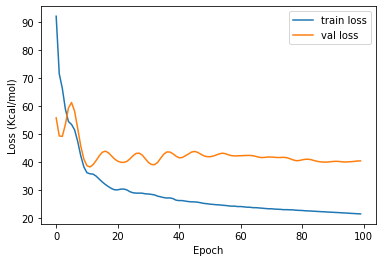

In [76]:
import matplotlib.pyplot as plt
# f, ax = plt.subplots()
plt.plot(range(len(pgnn_losses)), pgnn_losses, label='train loss')
plt.plot(range(len(pgnn_val_losses)), pgnn_val_losses, label='val loss')
plt.legend(loc='upper right');
plt.xlabel("Epoch")
plt.ylabel("Loss (Kcal/mol)")
plt.savefig('comb_loss.png')

In [37]:
# import matplotlib.pyplot as plt
# plt.plot(history_val_hybrid.history['loss'])
# plt.xlabel("Epoch")
# plt.ylabel("Loss (Kcal/mol)")
# plt.xlim(-1, 60)

In [38]:
len(y_test)

22

In [39]:
hybrid_model.input_shapes = [i.shape for i in x_preprocessed_test]
hybrid_model.modify_graphgather(len(y_test))

In [40]:
evalu = hybrid_model.evaluate(x_test, y_test.reshape([1, -1]))

1/1 [==============================] - 0s 34ms/step - loss: 40.3584


In [41]:
pgnn_rmse_test = np.sqrt(evalu)
print(pgnn_rmse_test)

6.352828121425989


In [42]:
train_loss = pgnn_losses[-1]

In [43]:
import math
train_hybrid_rmse = math.sqrt(train_loss[0])
train_hybrid_rmse

4.627304740095993

<h1> Physics based model RMSE </h1>

In [44]:
import math
train_sum=0
for i in range(len(host_names_train)):
    new_df = df[(df['Host'] == host_names_train[i]) & (df['Guest'] == guest_names_train[i])]
    train_sum += new_df['gb_Ex_difference'].to_numpy()[0] **2


test_sum = 0
for i in range(len(host_names_test)):
    new_df = df[(df['Host'] == host_names_test[i]) & (df['Guest'] == guest_names_test[i])]
    test_sum += new_df['gb_Ex_difference'].to_numpy()[0] **2
    

In [45]:
physics_based_rmse_train = math.sqrt(train_sum / len(host_names_train))

In [46]:
physics_based_rmse_test = math.sqrt((test_sum) / len(host_names_test))

In [47]:
print(f"RMSE on training set is : {physics_based_rmse_train}")
print(f"RMSE on testing set is : {physics_based_rmse_test}")
# Total rmse
total_rmse_physics = np.sqrt(np.mean((df['EX _H_(kcal/mol)'].to_numpy() - df['gb_delta_H'].to_numpy())**2))
print(f"RMSE of the total data: {total_rmse_physics}")

RMSE on training set is : 9.566673166822417
RMSE on testing set is : 7.9998636043486275
RMSE of the total data: 9.116540038105953


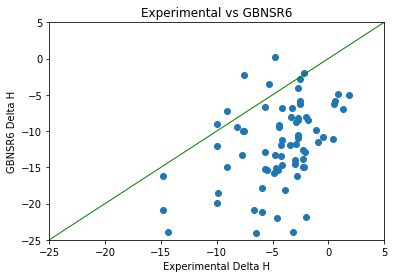

In [48]:
import matplotlib.pyplot as plt

plt.title("Experimental vs GBNSR6")
plt.scatter(x=df['EX _H_(kcal/mol)'], y=df['gb_delta_H'])
plt.xlabel("Experimental Delta H")
plt.ylabel("GBNSR6 Delta H")
plt.xlim(-25, 5)
plt.ylim(-25,5)

#reference line
plt.plot([-25, 5], [-25, 5], color='green', lw=1)

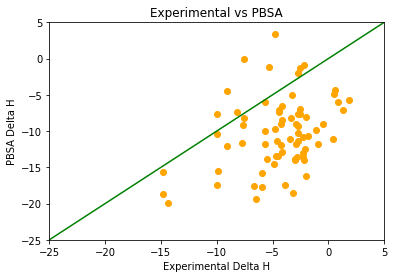

In [49]:
plt.title("Experimental vs PBSA")
plt.scatter(x=df['EX _H_(kcal/mol)'] ,y=df['pb_delta_H'], color='orange')
plt.xlabel("Experimental Delta H")
plt.ylabel("PBSA Delta H")
plt.xlim(-25, 5)
plt.ylim(-25,5)
#reference line
plt.plot([-25,5],[-25,5], color='green')

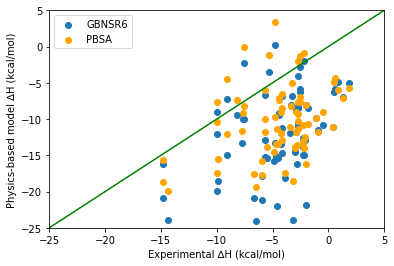

In [77]:
ax = plt.subplot()
# plt.title("PBSA vs GBNSR6")
plt.xlabel('Experimental ∆H (kcal/mol)')
plt.ylabel('Physics-based model ∆H (kcal/mol)')
ax.scatter(x=df["EX _H_(kcal/mol)"], y=df['gb_delta_H'], label="GBNSR6")
ax.scatter(x=df["EX _H_(kcal/mol)"], y=df['pb_delta_H'], label="PBSA", color="orange")
plt.xlim(-25,5)
plt.ylim(-25,5)
#reference line
plt.plot([-25,5],[-25,5],color='green')
plt.legend()
plt.savefig('gb-pb.png')

In [51]:
gb_correlation_matrix = np.corrcoef(df['gb_delta_H'], df['EX _H_(kcal/mol)'])
gb_correlation_gbex = gb_correlation_matrix[0,1]
gb_r_squared = gb_correlation_gbex**2
print(gb_r_squared)

0.16443424102892118


In [52]:
pb_correlation_matrix = np.corrcoef(df['pb_delta_H'], df['EX _H_(kcal/mol)'])
pb_correlation_pbex = pb_correlation_matrix[0,1]
pb_r_squared = pb_correlation_pbex**2
print(pb_r_squared)

0.1098144445778738


<h1> Data Driven Model </h1>

In [53]:
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
## !!!!!!!! important
input_shapes = [i.shape for i in x_preprocessed_train]

In [54]:
batch_size = len(host_names_train)
batch_size
# batch_size=10

50

In [55]:
# from deepchem.models.layers import GraphConv, GraphPool, GraphGather
# import tensorflow as tf
# import tensorflow.keras.layers as layers
# from tensorflow.keras.layers import Dense, Input, BatchNormalization, Concatenate
# from tensorflow.keras import initializers

# # batch_size = int(len(df) / 2)

# class GBGraphConvModel(tf.keras.Model):

#     def __init__(self):
#         super(GBGraphConvModel, self).__init__()
#         self.input_shapes = input_shapes
#         self.gc1 = GraphConv(64, activation_fn=tf.nn.tanh)
#         self.batch_norm1 = layers.BatchNormalization()
#         self.gp1 = GraphPool()

#         self.gc2 = GraphConv(64, activation_fn=tf.nn.tanh)
#         self.batch_norm2 = layers.BatchNormalization()
#         self.gp2 = GraphPool()

#         self.dense1 = layers.Dense(128, activation=tf.nn.tanh)
#         self.batch_norm3 = layers.BatchNormalization()
#         self.readout = GraphGather(batch_size=batch_size, activation_fn=tf.nn.tanh)

#         self.dense2 = layers.Dense(1)
#     #     self.dense3 = layers.Dense(1, 
#     #          kernel_initializer=initializers.Constant([.5, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1]),
#     #          bias_initializer=initializers.Zeros())

#     def call(self, inputs):
#         inputs = inputs[0]
#         x = []
#     #     input_shapes = [[4822, 75], [11, 2], [4822], [1142, 1], [1635, 2], [2042, 3],
#     #                    [3, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]
#         for i in range(len(self.input_shapes)):
#             x.append(tf.reshape(inputs[i][inputs[i] != 1.123456], self.input_shapes[i]))
#         for i in range(1, len(self.input_shapes)):
#             x[i] = tf.cast(x[i], tf.int32)
#         x_add = tf.reshape(inputs[13][inputs[13] != 1.123456], [batch_size, 15])
#         gc1_output = self.gc1(x)
#         batch_norm1_output = self.batch_norm1(gc1_output)
#         gp1_output = self.gp1([batch_norm1_output] + x[1:])

#         gc2_output = self.gc2([gp1_output] + x[1:])
#         batch_norm2_output = self.batch_norm1(gc2_output)
#         gp2_output = self.gp2([batch_norm2_output] + x[1:])

#         dense1_output = self.dense1(gp2_output)
#         batch_norm3_output = self.batch_norm3(dense1_output)
#         readout_output = self.readout([batch_norm3_output] + x[1:])

#         model_var = self.dense2(readout_output)
#     #     binding_affinity = tf.concat([model_var, x_add], axis=1)
#         return model_var #self.dense3(binding_affinity)
# model = GBGraphConvModel()
# model.compile(loss='mse', optimizer='adam')

In [56]:
from deepchem.models.layers import GraphConv, GraphPool, GraphGather
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Concatenate
from tensorflow.keras import initializers

# batch_size = int(len(df) / 2)

class GBGraphConvModel(tf.keras.Model):
   
    def modify_graphgather(self, batch_size):
        self.readout.batch_size = batch_size
        self.batch_size = batch_size

    def __init__(self, batch_size):
        super(GBGraphConvModel, self).__init__()
        self.input_shapes = None
        self.batch_size = batch_size
        self.gc1 = GraphConv(32, activation_fn=tf.nn.tanh)
        self.batch_norm1 = layers.BatchNormalization()
        self.gp1 = GraphPool()

        self.gc2 = GraphConv(32, activation_fn=tf.nn.tanh)
        self.batch_norm2 = layers.BatchNormalization()
        self.gp2 = GraphPool()

        self.dense1 = layers.Dense(64, activation=tf.nn.tanh)
        self.batch_norm3 = layers.BatchNormalization()
        self.readout = GraphGather(batch_size=self.batch_size, activation_fn=tf.nn.tanh)

        self.dense2 = layers.Dense(1)
    #     self.dense3 = layers.Dense(1, 
    #          kernel_initializer=initializers.Constant([.5, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1]),
    #          bias_initializer=initializers.Zeros())

    def call(self, inputs):
        inputs = inputs[0]
        x = []
    #     input_shapes = [[4822, 75], [11, 2], [4822], [1142, 1], [1635, 2], [2042, 3],
    #                    [3, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10]]
        for i in range(len(self.input_shapes)):
            x.append(tf.reshape(inputs[i][inputs[i] != 1.123456], self.input_shapes[i]))
        for i in range(1, len(self.input_shapes)):
            x[i] = tf.cast(x[i], tf.int32)
        x_add = tf.reshape(inputs[13][inputs[13] != 1.123456], [self.batch_size, 15])
        gc1_output = self.gc1(x)
        batch_norm1_output = self.batch_norm1(gc1_output)
        gp1_output = self.gp1([batch_norm1_output] + x[1:])

        gc2_output = self.gc2([gp1_output] + x[1:])
        batch_norm2_output = self.batch_norm1(gc2_output)
        gp2_output = self.gp2([batch_norm2_output] + x[1:])

        dense1_output = self.dense1(gp2_output)
        batch_norm3_output = self.batch_norm3(dense1_output)
        readout_output = self.readout([batch_norm3_output] + x[1:])

        model_var = self.dense2(readout_output)
    #     binding_affinity = tf.concat([model_var, x_add], axis=1)
        return model_var #self.dense3(binding_affinity)
dd_model = GBGraphConvModel(train_split_index)
dd_model.compile(loss='mse', optimizer='adam')

In [57]:
# history_dd_train = model.fit(x_train, y_train.reshape([1, -1]), epochs=200)

# history_dd_train = model.fit(x_train, y_train.reshape([1, -1]), epochs=100)

In [58]:
dd_losses, dd_val_losses = [], []
max_epoch = 100
val_size = len(y_val)
train_size = len(y_train)

for epoch in range(max_epoch):
    dd_model.modify_graphgather(train_size)
    dd_model.input_shapes = [i.shape for i in x_preprocessed_train]
    loss = dd_model.fit(x_train, y_train.reshape([1, -1]), epochs=1)
#     metric = dc.metrics.Metric(dc.metrics.score_function.rms_score)
    dd_losses.append(loss.history['loss'])
    dd_model.input_shapes = [i.shape for i in x_preprocessed_val]
    dd_model.modify_graphgather(val_size)
    dd_val_losses.append(dd_model.evaluate(x_val, y_val.reshape([1, -1])))

/Users/misspotato/opt/miniconda3/envs/rdkit-deepchem-jupyter/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Reshape_14:0", shape=(1056,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Reshape_13:0", shape=(1056, 64), dtype=float32), dense_shape=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/Users/misspotato/opt/miniconda3/envs/rdkit-deepchem-jupyter/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Reshape_17:0", shape=(3408,), dtype=int32), values=Tensor("gradient_tape/gb_graph_conv_model_1/graph_pool_3/Resh

1/1 [==============================] - 0s 31ms/step - loss: 42.6853


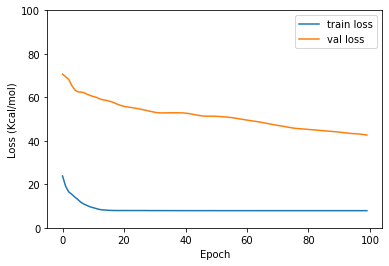

In [78]:
import matplotlib.pyplot as plt
# f, ax = plt.subplots()
plt.plot(range(len(dd_losses)), dd_losses, label='train loss')
plt.plot(range(len(dd_val_losses)), dd_val_losses, label='val loss')
plt.legend(loc='upper right');
plt.xlabel("Epoch")
plt.ylabel("Loss (Kcal/mol)")
plt.ylim(0,100)
plt.savefig('ind_loss.png')

In [60]:
dd_model.input_shapes = [i.shape for i in x_preprocessed_test]
dd_model.modify_graphgather(len(y_test))
test_pgnn_loss = dd_model.evaluate(x_test, y_test.reshape([1, -1]))

1/1 [==============================] - 0s 31ms/step - loss: 42.6853


In [61]:
dd_rmse_test = np.sqrt(test_pgnn_loss)
print(dd_rmse_test)

6.533396099074534


In [62]:
dd_train_loss = dd_losses[-1]
dd_train_loss

[7.8834099769592285]

In [63]:
import math
train_dd_rmse = math.sqrt(dd_train_loss[0])
train_dd_rmse

2.8077410808262266

<h1> Model Comparisons </h1>

In [64]:
# Test
from prettytable import PrettyTable
rmse_table = PrettyTable()
rmse_table.title="Test Set RMSE"
rmse_table.field_names = ["GBNSR6", "Data Driven", "PGNN"]
rmse_table.add_row(["{:.2f}".format(physics_based_rmse_test), "{:.2f}".format(dd_rmse_test),"{:.2f}".format(pgnn_rmse_test)])
print(rmse_table)

+-----------------------------+
|        Test Set RMSE        |
+--------+-------------+------+
| GBNSR6 | Data Driven | PGNN |
+--------+-------------+------+
|  8.00  |     6.53    | 6.35 |
+--------+-------------+------+


In [65]:
# Train
rmse_table = PrettyTable()
rmse_table.title="Train Set RMSE"
rmse_table.field_names = ["GBNSR6", "Data Driven", "PGNN"]
rmse_table.add_row(["{:.2f}".format(physics_based_rmse_train), "{:.2f}".format(train_dd_rmse),"{:.2f}".format(train_hybrid_rmse)])
print(rmse_table)

+-----------------------------+
|        Train Set RMSE       |
+--------+-------------+------+
| GBNSR6 | Data Driven | PGNN |
+--------+-------------+------+
|  9.57  |     2.81    | 4.63 |
+--------+-------------+------+
